In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **1. Read in Input and Basic Analysis**

In [2]:
# read in the input train data and check the first 5 rows
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
print(train_data.shape)

(891, 12)


In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# read in the input test data and check the first 5 rows
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.shape

(418, 11)

In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# check if there is any missing values
print(train_data.nunique())
print('\n')
print(test_data.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


In [9]:
# define a function to get a dictionary of feature/value in test data but missing in train data 
def get_test_only(train_data, test_data):
    test_only_dict = {}
    for col in test_data.columns:
        if col == 'PassengerId':
            continue
        train_set = set(train_data[col].unique())
        test_set = set(test_data[col].unique())
        test_only_list = list(test_set.difference(train_set))
        test_only_dict[col] = test_only_list
    return test_only_dict

In [10]:
# print out unexpected features with distinct values only in test data
test_only_dict = get_test_only(train_data, test_data)
for key in test_only_dict.keys():
    expected_features = ['Name', 'Ticket', 'Cabin']
    if key in expected_features:
        continue
    print(key, ": {}".format(test_only_dict[key]))

Pclass : []
Sex : []
Age : [0.17, 0.33, 67.0, 38.5, 11.5, 76.0, nan, 18.5, 22.5, 26.5, 60.5]
SibSp : []
Parch : [9]
Fare : [3.1708, 7.0, 136.7792, 9.6875, 7.8208, 8.9625, 7.2833, 13.9, 13.775, 15.5792, 7.7208, 9.325, 12.1833, 12.7375, 15.0333, 25.7417, 25.7, 27.4458, 28.5375, 31.5, 31.6792, 31.6833, 7.5792, 7.85, 42.5, 45.5, nan, 10.7083, 57.75, 60.0, 75.2417, 82.2667, 7.7792, 7.575]
Embarked : []


In [11]:
train_data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Notes:**
* **Need to pay attention to 'Parch', since test data has a value which doesn't exist in train data and out of range of train data.**
* **'Parch' is # of parents / children aboard the Titanic.**


# **2. Pre-processing**
## 2.1. Deal with Null

In [12]:
# check if there is any missing values
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### **Notes:**
* **Percentage of missing value for 'Cabin' is very high in both train and test data. Any imputation is likely to work poorly for 'Cabin'. It is better to drop this feature for model building.**
* **Percentage of missing value for 'Age' is ~20% for both train and test data. Imputation has a chance to work if model requires no NaN. It is not a good idea to drop 'Age' feature since intuitively it should have a significant impact on our target, survival.**
* **For the two missings for 'Embarked' in train data, it is safe to drop those two rows.**
* **For the only missing for 'Fare' in test data, we can not drop it. If model can not deal with nan, we can impute a value for it.**

In [14]:
# train data dropping
# from intuition, passengerId should not have big impact on the target
train_data_drop = train_data.drop(['PassengerId','Cabin'], axis = 1)
# drop the two rows with NaN for 'Embarked'
train_data_drop = train_data_drop[train_data_drop['Embarked'].notnull()]
train_data_drop.reset_index(inplace = True, drop = True)
print("# of missing of 'Embarked' after dropping: ", train_data_drop['Embarked'].isnull().sum())
print(train_data_drop.shape)

# test data dropping
test_data_drop = test_data.drop(['PassengerId','Cabin'], axis = 1)
print(test_data_drop.shape)

# of missing of 'Embarked' after dropping:  0
(889, 10)
(418, 9)


In [15]:
# impute for 'Age' and 'Fare'

def numerical_imputer(train_data, test_data, impute_list):
    from sklearn.impute import SimpleImputer as si
    imputer = si(strategy = 'median')

    train_data_impt = pd.DataFrame(imputer.fit_transform(train_data[impute_list]))
    test_data_impt = pd.DataFrame(imputer.fit_transform(test_data[impute_list]))

    train_data_impt.columns = train_data[impute_list].columns
    test_data_impt.columns = test_data[impute_list].columns

    train_data_imp = train_data.copy()
    test_data_imp = test_data.copy()

    train_data_imp[impute_list] = train_data_impt[impute_list]
    test_data_imp[impute_list] = test_data_impt[impute_list]

    return train_data_imp, test_data_imp

In [16]:
impute_list = ['Age', 'Fare']

train_data_imp, test_data_imp = numerical_imputer(train_data_drop, test_data_drop, impute_list)

print(train_data_imp.isnull().sum())
print('\n')
print(test_data_imp.isnull().sum())

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


In [17]:
train_data_imp

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
885,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
886,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
887,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [18]:
test_data_imp

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


## 2.2. Feature Engineering
### 2.2.1 Mutual Information Analysis

In [19]:
x_train = train_data_imp.drop('Survived', axis = 1)
y_train = train_data_imp[['Survived']]

# label encoding for categorical variables and get discrete_features mark for MIA
x_train_datatype = x_train.dtypes
x_train_obj_list = x_train_datatype[x_train_datatype == 'object'].index.to_list()

for col in x_train_obj_list:
    x_train[col], _ = x_train[col].factorize()
    
print(x_train.dtypes)
print('\n')
discrete_features = x_train.dtypes == 'int'
print(discrete_features)

Pclass        int64
Name          int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket        int64
Fare        float64
Embarked      int64
dtype: object


Pclass       True
Name         True
Sex          True
Age         False
SibSp        True
Parch        True
Ticket       True
Fare        False
Embarked     True
dtype: bool


In [20]:
x_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,0,0,22.0,1,0,0,7.2500,0
1,1,1,1,38.0,1,0,1,71.2833,1
2,3,2,1,26.0,0,0,2,7.9250,0
3,1,3,1,35.0,1,0,3,53.1000,0
4,3,4,0,35.0,0,0,4,8.0500,0
...,...,...,...,...,...,...,...,...,...
884,2,884,0,27.0,0,0,676,13.0000,0
885,1,885,1,19.0,0,0,677,30.0000,0
886,3,886,1,28.0,1,2,613,23.4500,0
887,1,887,0,26.0,0,0,678,30.0000,1


In [21]:
x_train.describe()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,444.000000,0.350956,29.315152,0.524184,0.382452,306.536558,32.096681,0.362205
std,0.834700,256.776492,0.477538,12.984932,1.103705,0.806761,196.988587,49.697504,0.636157
min,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,222.000000,0.000000,22.000000,0.000000,0.000000,135.000000,7.895800,0.000000
50%,3.000000,444.000000,0.000000,28.000000,0.000000,0.000000,285.000000,14.454200,0.000000
75%,3.000000,666.000000,1.000000,35.000000,1.000000,0.000000,474.000000,31.000000,1.000000
max,3.000000,888.000000,1.000000,80.000000,8.000000,6.000000,679.000000,512.329200,2.000000


In [22]:
def get_mi_score(x_train, y_train):
    
    # label encoding for categorical variables and get discrete_features mark for MIA
    x_train_datatype = x_train.dtypes
    x_train_obj_list = x_train_datatype[x_train_datatype == 'object'].index.to_list()
    for col in x_train_obj_list:
        x_train[col], _ = x_train[col].factorize()
    discrete_features = x_train.dtypes == 'int'

    from sklearn.feature_selection import mutual_info_classif
    mi_scores = mutual_info_classif(x_train, y_train, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores, name = 'MI_score', index = x_train.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores

In [23]:
get_mi_score(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Name        0.665252
Ticket      0.571626
Sex         0.149725
Fare        0.134773
Pclass      0.057127
SibSp       0.023490
Parch       0.016653
Embarked    0.014547
Age         0.008246
Name: MI_score, dtype: float64

### **Notes:**
* **'Name' and 'Ticket' are dominating MIA due to their high values.**
* **Normalization before MIA should help.**

In [24]:
# calculate MIA again with normalization
x_train_new = (x_train - x_train.mean(axis = 0)) / x_train.std(axis = 0)
mi_score = get_mi_score(x_train_new, y_train)
mi_score

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Sex         0.137264
Fare        0.132679
Ticket      0.097597
Pclass      0.069975
SibSp       0.038240
Age         0.036157
Parch       0.019858
Name        0.013109
Embarked    0.002228
Name: MI_score, dtype: float64

Text(0, 0.5, 'Features')

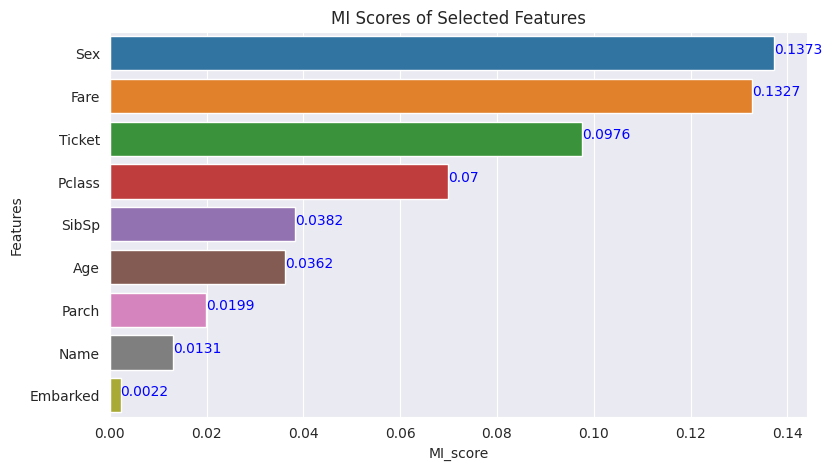

In [25]:
# make a bar plot to compare MI scores
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (9,5))
mi_score = pd.DataFrame(mi_score)
sns.set_style('darkgrid')
sns.barplot(y = mi_score.index, x = 'MI_score', data = mi_score)

import numpy as np
index_list = np.arange(0, mi_score.shape[0]).tolist()
i = 0
for row in mi_score.index:
    value = mi_score.loc[row,:].MI_score
    value = (round(value,4))
    plt.annotate(value, xy = (value, i), color = 'blue')
    i += 1

plt.title('MI Scores of Selected Features')
plt.ylabel('Features')

### 2.2.2 Principal Component Analysis

In [26]:
def get_pca(x_train_data, standardize = True):
    if standardize:
        x_train_data = (x_train_data - x_train_data.mean(axis = 0)) / x_train_data.std(axis = 0)
    from sklearn.decomposition import PCA
    pca = PCA()
    x_pca = pca.fit_transform(x_train_data)
    comp_names = [f"PC{i+1}" for i in range(x_pca.shape[1])]
    x_pca = pd.DataFrame(x_pca, columns = comp_names)
    loadings = pd.DataFrame(pca.components_.T, columns = comp_names, index = x_train_data.columns)
    return pca, x_pca, loadings

In [27]:
# let numerical features and binary categorical features for CPA
x_train_new_large_MI = x_train_new[['Sex', 'Fare', 'Pclass', 'Embarked', 'Parch', 'SibSp', 'Age']]
pca, x_pca, loadings = get_pca(x_train_new_large_MI, False)

In [28]:
test_data_pca = test_data_imp.drop(['Name','Ticket'], axis = 1)

# label encoding for categorical variables and get discrete_features mark for MIA
test_data_pca_datatype = test_data_pca.dtypes
x_test_obj_list = test_data_pca_datatype[test_data_pca_datatype == 'object'].index.to_list()

for col in x_test_obj_list:
    test_data_pca[col], _ = test_data_pca[col].factorize()

test_data_pca = (test_data_pca - test_data_pca.mean(axis = 0)) / test_data_pca.std(axis = 0)
test_data_pca = test_data_pca[['Sex', 'Fare', 'Pclass', 'Embarked', 'Parch', 'SibSp', 'Age']]

test_data_pca
test_pca = pca.transform(test_data_pca)
comp_names = [f"PC{i+1}" for i in range(test_pca.shape[1])]
test_pca = pd.DataFrame(test_pca, columns = comp_names)
test_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.323105,-0.096868,-1.796224,-0.668278,-0.018230,0.073436,0.716493
1,-0.093180,-0.106079,0.233211,-1.069208,1.429874,-1.191886,0.745057
2,-0.904317,1.762957,-2.218830,-0.769484,1.412906,-0.232116,0.351183
3,-1.287662,-0.333047,-0.253189,0.153444,-0.155458,0.272043,0.335319
4,0.499643,-1.525546,0.358029,-0.982139,0.230299,-0.285875,0.224912
...,...,...,...,...,...,...,...
413,-1.293822,-0.336234,-0.253160,0.150191,-0.152030,0.270793,0.328371
414,1.451165,1.933080,1.730819,-0.120645,-0.094676,-0.218557,-0.044762
415,-1.327413,0.160644,-0.375783,0.097836,0.565135,0.175021,0.502663
416,-1.293822,-0.336234,-0.253160,0.150191,-0.152030,0.270793,0.328371


In [29]:
x_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.939008,-0.892816,-0.655269,0.351353,-0.313804,-0.389671,0.201033
1,1.521326,1.387515,1.168596,-0.170189,0.098668,-0.986022,-0.430100
2,-0.458752,-0.508749,0.395480,-1.565440,-0.219207,-0.393572,0.569611
3,1.312825,1.074614,-0.134086,-0.983530,-0.272010,-1.127345,-0.461386
4,-1.308482,0.045600,-0.618348,-0.038230,0.253809,0.103460,0.497433
...,...,...,...,...,...,...,...
884,-0.770020,0.391131,-0.665433,0.028049,-0.527335,0.093935,-0.396193
885,0.736229,0.637137,0.206740,-1.397059,-1.312386,-0.456776,-0.922042
886,1.240493,-1.582758,-0.143325,-1.250741,0.942910,0.710766,0.273718
887,-0.101075,1.184202,0.548752,0.854694,-0.656705,0.179632,-1.274318


In [30]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0))
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

array([<AxesSubplot: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

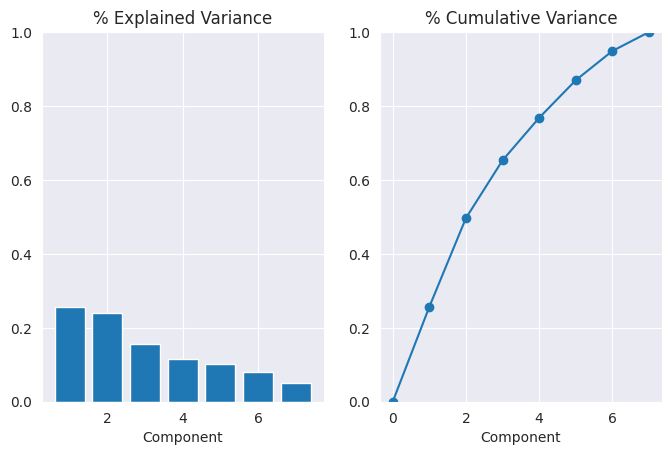

In [31]:
plot_variance(pca)

In [32]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Sex,0.397113,-0.081176,0.439289,-0.746534,0.034324,-0.271635,0.102273
Fare,0.561736,0.290607,-0.002666,0.296587,-0.312552,0.113987,0.633520
Pclass,-0.388241,-0.548890,0.108762,-0.003336,0.221167,0.070906,0.694410
Embarked,0.006039,0.050064,0.849247,0.456191,0.192845,0.078657,-0.157325
Parch,0.475120,-0.351117,-0.138956,-0.044743,0.372293,0.677743,-0.178129
SibSp,0.386590,-0.418975,-0.190524,0.376532,0.237913,-0.657158,-0.092056
Age,-0.028218,0.553488,-0.135501,-0.053142,0.787289,-0.103994,0.202561


### **Notes:**
* **From PCA, we can try including the PCs as input features.**
* **From loading info, product of 'Fare' and 'Pclass' can be usefull to represent the ticket status of each person.**

### 2.2.3 Features Creation

In [33]:
# define a function to tokenize Name column and split Ticket column
def pre_process(df):
    df = df.copy()
    def normalize_name(x):
        return " ".join([v.strip(",()[].\"'") for v in x.split()])
    def ticket_number(x):
        return x.split()[-1]
    def ticket_item(x):
        items = x.split()
        if len(items) == 1:
            return 'None'
        return "_".join(items[0:-1])
    
    df["Name"] = df["Name"].apply(normalize_name)
    df["Ticket_number"] = df["Ticket"].apply(ticket_number)
    df["Ticket_item"] = df["Ticket"].apply(ticket_item)
    return df

In [34]:
pre1_train_data = pre_process(train_data)
pre1_test_data = pre_process(test_data)

pre1_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item
0,1,0,3,Braund Mr Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,A/5
1,2,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,PC 17599,71.2833,C85,C,17599,PC
2,3,1,3,Heikkinen Miss Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,STON/O2.
3,4,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,113803,53.1000,C123,S,113803,None
4,5,0,3,Allen Mr William Henry,male,35.0,0,0,373450,8.0500,NaN,S,373450,None


In [35]:
pre2_train_data = pre1_train_data[pre1_train_data['Embarked'].notnull()]
pre2_train_data.reset_index(inplace = True, drop = True)

pre2_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item
0,1,0,3,Braund Mr Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,A/5
1,2,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,PC 17599,71.2833,C85,C,17599,PC
2,3,1,3,Heikkinen Miss Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,STON/O2.
3,4,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,113803,53.1000,C123,S,113803,None
4,5,0,3,Allen Mr William Henry,male,35.0,0,0,373450,8.0500,NaN,S,373450,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,Montvila Rev Juozas,male,27.0,0,0,211536,13.0000,NaN,S,211536,None
885,888,1,1,Graham Miss Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S,112053,None
886,889,0,3,Johnston Miss Catherine Helen Carrie,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,6607,W./C.
887,890,1,1,Behr Mr Karl Howell,male,26.0,0,0,111369,30.0000,C148,C,111369,None


In [36]:
pre2_train_data = pre2_train_data.join(x_pca)
pre2_test_data = pre1_test_data.join(test_pca)
pre1_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item
0,892,3,Kelly Mr James,male,34.5,0,0,330911,7.8292,NaN,Q,330911,None
1,893,3,Wilkes Mrs James Ellen Needs,female,47.0,1,0,363272,7.0000,NaN,S,363272,None
2,894,2,Myles Mr Thomas Francis,male,62.0,0,0,240276,9.6875,NaN,Q,240276,None
3,895,3,Wirz Mr Albert,male,27.0,0,0,315154,8.6625,NaN,S,315154,None
4,896,3,Hirvonen Mrs Alexander Helga E Lindqvist,female,22.0,1,1,3101298,12.2875,NaN,S,3101298,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Spector Mr Woolf,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,3236,A.5.
414,1306,1,Oliva y Ocana Dona Fermina,female,39.0,0,0,PC 17758,108.9000,C105,C,17758,PC
415,1307,3,Saether Mr Simon Sivertsen,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,3101262,SOTON/O.Q.
416,1308,3,Ware Mr Frederick,male,NaN,0,0,359309,8.0500,NaN,S,359309,None


In [37]:
pre2_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,892,3,Kelly Mr James,male,34.5,0,0,330911,7.8292,NaN,Q,330911,None,-1.323105,-0.096868,-1.796224,-0.668278,-0.018230,0.073436,0.716493
1,893,3,Wilkes Mrs James Ellen Needs,female,47.0,1,0,363272,7.0000,NaN,S,363272,None,-0.093180,-0.106079,0.233211,-1.069208,1.429874,-1.191886,0.745057
2,894,2,Myles Mr Thomas Francis,male,62.0,0,0,240276,9.6875,NaN,Q,240276,None,-0.904317,1.762957,-2.218830,-0.769484,1.412906,-0.232116,0.351183
3,895,3,Wirz Mr Albert,male,27.0,0,0,315154,8.6625,NaN,S,315154,None,-1.287662,-0.333047,-0.253189,0.153444,-0.155458,0.272043,0.335319
4,896,3,Hirvonen Mrs Alexander Helga E Lindqvist,female,22.0,1,1,3101298,12.2875,NaN,S,3101298,None,0.499643,-1.525546,0.358029,-0.982139,0.230299,-0.285875,0.224912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Spector Mr Woolf,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,3236,A.5.,-1.293822,-0.336234,-0.253160,0.150191,-0.152030,0.270793,0.328371
414,1306,1,Oliva y Ocana Dona Fermina,female,39.0,0,0,PC 17758,108.9000,C105,C,17758,PC,1.451165,1.933080,1.730819,-0.120645,-0.094676,-0.218557,-0.044762
415,1307,3,Saether Mr Simon Sivertsen,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,3101262,SOTON/O.Q.,-1.327413,0.160644,-0.375783,0.097836,0.565135,0.175021,0.502663
416,1308,3,Ware Mr Frederick,male,NaN,0,0,359309,8.0500,NaN,S,359309,None,-1.293822,-0.336234,-0.253160,0.150191,-0.152030,0.270793,0.328371


# **3. Modeling**
## **3.1. tfdf.keras.RandomForestModel**
### tfdf.keras.RandomForestModel can take care of NaN values

In [38]:
# create a list of features for modeling 
features = list(pre2_train_data.columns)

features.remove('Ticket')
features.remove('PassengerId')
features.remove('Survived')
features.remove('Name')

print("Input features: {}".format(features))

Input features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Ticket_number', 'Ticket_item', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']


In [39]:
# convert pandas dataframe to tensorflow dataset
import tensorflow as tf
import tensorflow_decision_forests as tfdf

#def tokenize_names(df, labels = None):
#    df['Name'] = tf.strings.split(df['Name'])
#    return df, labels

# auto hyperparameter tuning can not handle categorical set ['Name']
pre2_train_data = pre2_train_data.drop('Name', axis = 1)
pre2_test_data = pre2_test_data.drop('Name', axis = 1)
#pre2_test_data.head()

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(pre2_train_data, label = 'Survived')
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(pre2_test_data)

#type(train_ds)

## 3.1.1. Train model with default parameters

In [40]:
# train 2nd model: gradient boosted trees model

model = tfdf.keras.GradientBoostedTreesModel(verbose = 0,
                                            features = [tfdf.keras.FeatureUsage(name = n) for n in features],
                                            exclude_non_specified_features = True,
                                            random_seed = 1234)
model.fit(train_ds)

[INFO 2023-05-30T18:21:13.346318194+00:00 kernel.cc:1214] Loading model from path /tmp/tmpniwp5__5/model/ with prefix 00b6bffb544e4c81
[INFO 2023-05-30T18:21:13.353282676+00:00 abstract_model.cc:1311] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 2023-05-30T18:21:13.35341627+00:00 kernel.cc:1046] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [41]:
# evalue the accuracy
self_evaluation = model.make_inspector().evaluation()
print(f"Accuracy: {self_evaluation.accuracy}  Loss: {self_evaluation.loss}")

Accuracy: 0.7802197933197021  Loss: 0.9438779950141907


In [42]:
# valuate the model
model.compile(['accuracy'])
model_accuracy = model.evaluate(train_ds, return_dict = True, verbose = 0)['accuracy']
model_accuracy

0.8931383490562439

In [43]:
# list the default hyperparameters of the model
model.learner_params

{'adapt_subsample_for_maximum_training_duration': False,
 'allow_na_conditions': False,
 'apply_link_function': True,
 'categorical_algorithm': 'CART',
 'categorical_set_split_greedy_sampling': 0.1,
 'categorical_set_split_max_num_items': -1,
 'categorical_set_split_min_item_frequency': 1,
 'compute_permutation_variable_importance': False,
 'dart_dropout': 0.01,
 'early_stopping': 'LOSS_INCREASE',
 'early_stopping_initial_iteration': 10,
 'early_stopping_num_trees_look_ahead': 30,
 'focal_loss_alpha': 0.5,
 'focal_loss_gamma': 2.0,
 'forest_extraction': 'MART',
 'goss_alpha': 0.2,
 'goss_beta': 0.1,
 'growing_strategy': 'LOCAL',
 'honest': False,
 'honest_fixed_separation': False,
 'honest_ratio_leaf_examples': 0.5,
 'in_split_min_examples_check': True,
 'keep_non_leaf_label_distribution': True,
 'l1_regularization': 0.0,
 'l2_categorical_regularization': 1.0,
 'l2_regularization': 0.0,
 'lambda_loss': 1.0,
 'loss': 'DEFAULT',
 'max_depth': 6,
 'max_num_nodes': None,
 'maximum_model_si

## 3.1.2. Train model with automated hyper-parameter tuning
### Automatci defination of the hyper-parameters

In [44]:
# Create a Random Search tuner with 100 trials and automatic hp configuration.
tuner = tfdf.tuner.RandomSearch(num_trials = 100, use_predefined_hps = True)

In [45]:
# train the model with automatic tuning
auto_tuned_model = tfdf.keras.GradientBoostedTreesModel(tuner = tuner)
auto_tuned_model.fit(train_ds, verbose = 2)

Use /tmp/tmplf_8vqpz as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'PassengerId': <tf.Tensor 'data_12:0' shape=(None,) dtype=int64>, 'Pclass': <tf.Tensor 'data_13:0' shape=(None,) dtype=int64>, 'Sex': <tf.Tensor 'data_14:0' shape=(None,) dtype=string>, 'Age': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'SibSp': <tf.Tensor 'data_15:0' shape=(None,) dtype=int64>, 'Parch': <tf.Tensor 'data_11:0' shape=(None,) dtype=int64>, 'Ticket': <tf.Tensor 'data_16:0' shape=(None,) dtype=string>, 'Fare': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'Cabin': <tf.Tensor 'data_1:0' shape=(None,) dtype=string>, 'Embarked': <tf.Tensor 'data_2:0' shape=(None,) dtype=string>, 'Ticket_number': <tf.Tensor 'data_18:0' shape=(None,) dtype=string>, 'Ticket_item': <tf.Tensor 'data_17:0' shape=(None,) dtype=string>, 'PC1': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'PC2': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'PC3': <tf.Tensor 'd

[INFO 2023-05-30T18:21:18.035942244+00:00 kernel.cc:756] Start Yggdrasil model training
[INFO 2023-05-30T18:21:18.036096662+00:00 kernel.cc:757] Collect training examples
[INFO 2023-05-30T18:21:18.036222926+00:00 kernel.cc:388] Number of batches: 1
[INFO 2023-05-30T18:21:18.036241574+00:00 kernel.cc:389] Number of examples: 889
[INFO 2023-05-30T18:21:18.037113732+00:00 data_spec_inference.cc:303] 146 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Cabin (0 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 2023-05-30T18:21:18.037332769+00:00 data_spec_inference.cc:303] 672 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Ticket (8 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 2023-05-30T18:21:18.037442972+00:00 data_spec_inference.cc:303] 28 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Ticket_item (16 item(

Model trained in 0:01:45.429603
Compiling model...
Model compiled.


In [46]:
self_evaluation = auto_tuned_model.make_inspector().evaluation()
print(f"Accuracy: {self_evaluation.accuracy}    Loss: {self_evaluation.loss}")

Accuracy: 0.7945205569267273    Loss: 0.927769124507904


In [47]:
# valuate the model
auto_tuned_model.compile(['accuracy'])
model_accuracy = auto_tuned_model.evaluate(train_ds, return_dict = True, verbose = 0)['accuracy']
model_accuracy

0.9190101027488708

In [48]:
# The hyper-parameters and objective scores of the trials are available in the model inspector. 
# display the tuning logs
tuning_logs = auto_tuned_model.make_inspector().tuning_logs()
print(tuning_logs.shape)

(100, 17)


In [49]:
# The score value is always maximized. 
# score below is the negative log loss on the validation dataset (selected automatically).
tuning_logs.head()

,score,evaluation_time,best,split_axis,sparse_oblique_projection_density_factor,sparse_oblique_normalization,sparse_oblique_weights,categorical_algorithm,growing_strategy,max_num_nodes,sampling_method,subsample,shrinkage,min_examples,use_hessian_gain,num_candidate_attributes_ratio,max_depth
0,-0.997237,2.912175,False,SPARSE_OBLIQUE,1.0,NONE,BINARY,CART,BEST_FIRST_GLOBAL,64.0,RANDOM,1.0,0.10,20,false,0.2,NaN
1,-0.990506,3.401996,False,SPARSE_OBLIQUE,3.0,NONE,BINARY,RANDOM,LOCAL,NaN,RANDOM,1.0,0.10,5,false,0.5,8.0
2,-0.943168,3.414845,False,SPARSE_OBLIQUE,5.0,MIN_MAX,BINARY,CART,BEST_FIRST_GLOBAL,32.0,RANDOM,1.0,0.10,10,false,0.2,NaN
3,-0.955766,6.132722,False,SPARSE_OBLIQUE,4.0,STANDARD_DEVIATION,CONTINUOUS,RANDOM,BEST_FIRST_GLOBAL,256.0,RANDOM,1.0,0.10,20,true,0.5,NaN
4,-0.992669,6.207620,False,SPARSE_OBLIQUE,2.0,NONE,BINARY,RANDOM,BEST_FIRST_GLOBAL,128.0,RANDOM,0.8,0.02,10,true,0.9,NaN


In [50]:
# Best hyper-parameters.
tuning_logs[tuning_logs.best].iloc[0]

# Parameters with NaN value are conditional parameters that are not set.

score                                               -0.927769
evaluation_time                                     74.480449
best                                                     True
split_axis                                     SPARSE_OBLIQUE
sparse_oblique_projection_density_factor                  1.0
sparse_oblique_normalization                             NONE
sparse_oblique_weights                             CONTINUOUS
categorical_algorithm                                  RANDOM
growing_strategy                            BEST_FIRST_GLOBAL
max_num_nodes                                           512.0
sampling_method                                        RANDOM
subsample                                                 0.6
shrinkage                                                 0.1
min_examples                                                7
use_hessian_gain                                        false
num_candidate_attributes_ratio                            0.5
max_dept

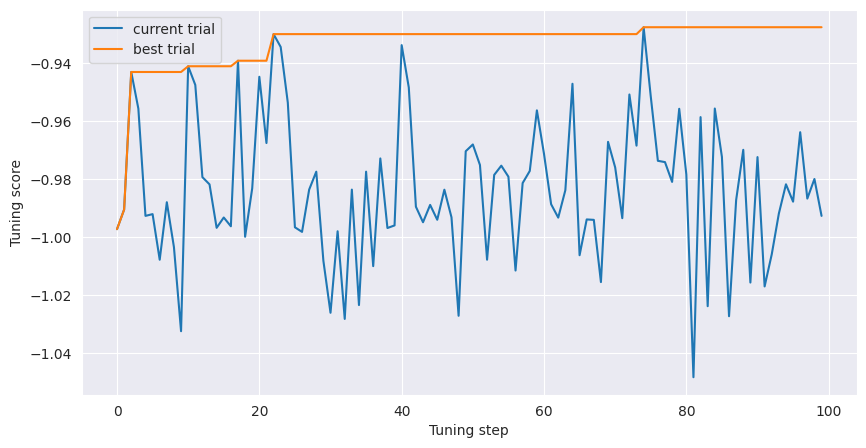

In [51]:
# plot the evaluation of the best score during tuning
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(tuning_logs["score"], label="current trial")
plt.plot(tuning_logs["score"].cummax(), label="best trial")
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()
plt.show()

# **4. Submission**

In [52]:
# create output datafram and save to a csv file
def prediction(model, threshold = 0.5):
    proba = model.predict(test_ds)[:,0]
    return pd.DataFrame({'PassengerID': pre1_test_data['PassengerId'], 'Survived': (proba>=threshold).astype(int)})

def make_summision(yhat_df):
    return yhat_df.to_csv("submission.csv", index = False)
    print('Submission was successful!')

yhat_df = prediction(auto_tuned_model)
make_summision(yhat_df)

1/1 [==============================] - 0s 82ms/step


In [53]:
# preview the predictions on test data
yhat_df

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
